# Group Members
Pierre Mercatoris – Pablo Bordons Estrada - Sergio Gámez Ruiz de Olano – Mohammadmehdi
Fayazbakhsh

In [72]:
%matplotlib notebook
from __future__ import division
import numpy as np
import time

nsample = 1000
nvariables = 100
X0=np.ones([nsample, 1])
X1=np.random.uniform(0, 10, ([nsample,nvariables]))
X=np.concatenate([X0, X1], axis=1)
error=np.random.normal(0, 1, (nsample,1)) # Normal random error
beta=np.random.uniform(-5, 5, size=([nvariables+1, 1]))
Y=np.dot(X, beta)+error
print(beta)

[[ 1.28069035]
 [ 2.12055007]
 [-3.35364129]
 [ 2.49180722]
 [-2.8342821 ]
 [ 2.01194948]
 [-2.85385757]
 [ 0.3348794 ]
 [ 1.54505771]
 [ 3.76039123]
 [-3.08866171]
 [-0.51838654]
 [ 4.079594  ]
 [ 3.20824974]
 [ 4.02375764]
 [ 1.82350012]
 [ 2.73740613]
 [ 4.83990623]
 [ 4.78336779]
 [-2.28676607]
 [-2.59697585]
 [-4.13702962]
 [-2.42724456]
 [ 4.51397344]
 [-4.76847074]
 [ 4.55519664]
 [ 4.76617981]
 [-0.63032856]
 [-4.11676195]
 [ 1.24741552]
 [-3.9683488 ]
 [-1.08071633]
 [-0.25369959]
 [-2.47735284]
 [ 2.05335703]
 [ 4.89243931]
 [ 2.84978551]
 [ 0.31243966]
 [ 4.83657486]
 [ 0.43747194]
 [-0.77572563]
 [ 3.27644737]
 [-1.55841983]
 [ 0.09359911]
 [ 2.1735441 ]
 [ 1.83173806]
 [ 4.21374777]
 [ 2.44924523]
 [-0.69330504]
 [-1.93368367]
 [ 4.97225515]
 [ 2.40465098]
 [-2.23907213]
 [ 4.66306122]
 [-2.9983419 ]
 [-2.31792161]
 [-4.7092036 ]
 [ 2.54629324]
 [ 3.39634   ]
 [ 4.70833798]
 [ 4.21943738]
 [-3.46481252]
 [-4.70657762]
 [-0.37296535]
 [ 0.14072207]
 [ 4.26372857]
 [ 4.68691

## A)
Estimate the value of the regression coefficients by using the analytical solution for the least squares
estimation problem.

In [73]:
time_start = time.clock()
beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print(beta_ls_exact)

('time elapsed=', 0.0023641579900868237)
[[ 1.73944484]
 [ 2.11849576]
 [-3.3627126 ]
 [ 2.49636401]
 [-2.84054722]
 [ 2.02156168]
 [-2.86232325]
 [ 0.35178602]
 [ 1.543078  ]
 [ 3.75664986]
 [-3.10144696]
 [-0.49563234]
 [ 4.07457553]
 [ 3.19734595]
 [ 4.01312126]
 [ 1.81554646]
 [ 2.73727512]
 [ 4.86453595]
 [ 4.78753664]
 [-2.28646111]
 [-2.60981044]
 [-4.13475238]
 [-2.42150444]
 [ 4.51678882]
 [-4.76576907]
 [ 4.55297872]
 [ 4.76157291]
 [-0.63205529]
 [-4.11615598]
 [ 1.24171108]
 [-3.95975354]
 [-1.08472859]
 [-0.25454118]
 [-2.45531301]
 [ 2.04235535]
 [ 4.90231666]
 [ 2.83335418]
 [ 0.28134911]
 [ 4.84884805]
 [ 0.42513108]
 [-0.79616354]
 [ 3.25057585]
 [-1.57517965]
 [ 0.0961234 ]
 [ 2.17431404]
 [ 1.82505696]
 [ 4.22074613]
 [ 2.44749707]
 [-0.70609706]
 [-1.94542769]
 [ 4.95931038]
 [ 2.40542927]
 [-2.24506929]
 [ 4.64658585]
 [-2.99305659]
 [-2.30420422]
 [-4.70322873]
 [ 2.55568737]
 [ 3.39306073]
 [ 4.69860549]
 [ 4.21740776]
 [-3.46522597]
 [-4.70731893]
 [-0.38375324]

## B

[2.0977724073092068, 1.0434809952479307, 2.4665810510725774, 6.714342056905366, 0.99945970610573576, 1.3579490130539547, 6.6804736051702136, 16.2173602447095, 2.0595882724731904, 13.886308752737673, 11.742043116178328, 4.7058005551245303, 4.674682595374434, 15.484317482790741, 21.873975836452829, 10.694079438587542, 9.3725619835101668, 13.050946999504074]


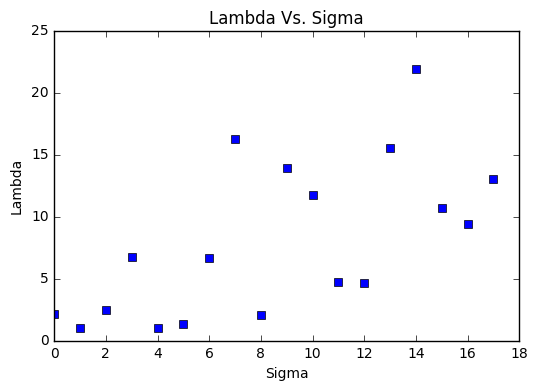

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
lambda_est=[]
sigma=np.arange(1,10, 0.5)

for i in sigma :
    error=np.random.normal(0, i, (nsample,1)) # Normal random error with different sigma
    Y=np.dot(X, beta)+error
    beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
    lambda_est.append((np.linalg.norm(beta-beta_ls_exact,ord=2)/np.linalg.norm(beta,ord=2))*100)
    
print lambda_est


plt.plot(lambda_est, 'bs')
plt.xlabel('Sigma')
plt.ylabel('Lambda')
plt.title('Lambda Vs. Sigma')
plt.show()

## C)
Estimate the value of the regression coefficients (least squares) by using the tool minimize from the
python package Scipy.optimize. Try at least three available solvers and compare their performance
(iterations, function, gradient and hessian evaluations as well as total computational time).


In [77]:
# c : Newton-CG
from scipy.optimize import minimize

def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.dot(np.transpose(Y-np.dot(X,np.transpose(beta_ls))),X)
    return np.squeeze(np.asarray(pp))
        
        
def least_sq_reg_hess(beta_ls,X,Y):
    return 2*np.dot(np.transpose(X),X)



time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'Newton-CG',jac=least_sq_reg_der, hess=least_sq_reg_hess, options = {'disp': True})
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print(res.x)
np.linalg.inv(least_sq_reg_hess(res.x,X,Y))
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


Optimization terminated successfully.
         Current function value: 84919.433779
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 27
         Hessian evaluations: 13
('time elapsed=', 0.01405822801461909)
[-2.82008067  2.18757466 -3.33272327  2.40049448 -2.91963727  2.00327112
 -2.92131844  0.38737346  1.41670753  3.80403476 -3.04939229 -0.58693961
  4.13023388  3.2712188   4.06065034  1.86865285  2.90094534  5.10282956
  4.75282604 -2.3773995  -2.74905144 -3.94538837 -2.45767374  4.49870427
 -4.74963116  4.5581906   4.65647517 -0.59536712 -4.19275214  1.24511272
 -3.89736906 -1.04011949 -0.2648055  -2.28654196  2.16801341  4.92252474
  2.94042701  0.53332892  4.79756196  0.43628567 -0.86060568  3.35301637
 -1.41157385  0.06995832  2.14622713  1.82173066  4.29591559  2.45075603
 -0.63613901 -1.91125291  4.94260168  2.30714525 -2.39602297  4.6346139
 -3.05933576 -2.51372002 -4.71725957  2.5502426   3.42703598  4.78687509
  4.21202156 -3.5424836

In [78]:
# c: dogleg

from scipy.optimize import minimize

def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.dot(np.transpose(Y-np.dot(X,np.transpose(beta_ls))),X)
    return np.squeeze(np.asarray(pp))
        
        
def least_sq_reg_hess(beta_ls,X,Y):
    return 2*np.dot(np.transpose(X),X)



time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'dogleg',jac=least_sq_reg_der, hess=least_sq_reg_hess, options = {'disp': True})
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print(res.x)
np.linalg.inv(least_sq_reg_hess(res.x,X,Y))
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


Optimization terminated successfully.
         Current function value: 84919.433768
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Hessian evaluations: 6
('time elapsed=', 0.008869112425600179)
[-2.82009166  2.18757262 -3.33272408  2.40050035 -2.91964431  2.00327309
 -2.92131935  0.38737545  1.41670728  3.80403217 -3.04939149 -0.58693972
  4.13024247  3.27121943  4.06064646  1.86865365  2.9009471   5.1028255
  4.75282718 -2.37740208 -2.74905513 -3.94539386 -2.45767779  4.49870622
 -4.74962366  4.55818668  4.65647563 -0.59536061 -4.19274504  1.24511478
 -3.8973661  -1.04011885 -0.26481368 -2.28654173  2.16800687  4.92252054
  2.94043056  0.5333243   4.79756441  0.43627901 -0.86060974  3.35301358
 -1.41157203  0.06996948  2.14622611  1.8217317   4.29591723  2.45076112
 -0.63614187 -1.91125437  4.94259785  2.30714669 -2.39602395  4.63460325
 -3.05933115 -2.51371899 -4.71726272  2.55024272  3.42703614  4.7868769
  4.21201842 -3.5424867  -4

In [79]:
from scipy.optimize import minimize

def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.dot(np.transpose(z),z) #sum of the square errors, value of the obj function

In [80]:
# c :BFGS

beta_ls0 = np.zeros(nvariables+1) #we need to initiate our initial point
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'BFGS', options = {'disp': True}) #arguments for the model are X and Y
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print (res.x) 
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))

         Current function value: 84919.433768
         Iterations: 131
         Function evaluations: 24515
         Gradient evaluations: 238
('time elapsed=', 1.4608064334461233)
[-2.8200985   2.18757251 -3.33272404  2.40050027 -2.9196443   2.00327308
 -2.92131936  0.3873754   1.41670726  3.80403212 -3.04939138 -0.5869397
  4.13024253  3.27121944  4.0606465   1.86865365  2.90094716  5.10282556
  4.75282723 -2.3774021  -2.74905506 -3.94539385 -2.45767775  4.49870628
 -4.74962365  4.5581867   4.65647564 -0.59536055 -4.19274501  1.2451148
 -3.89736611 -1.04011893 -0.2648137  -2.28654166  2.1680069   4.92252054
  2.94043061  0.53332426  4.79756441  0.43627895 -0.86060973  3.35301358
 -1.411572    0.06996955  2.14622612  1.82173174  4.29591722  2.45076115
 -0.63614186 -1.91125438  4.94259787  2.30714665 -2.39602388  4.63460324
 -3.05933111 -2.51371897 -4.71726272  2.55024273  3.42703609  4.78687685
  4.2120184  -3.54248668 -4.50429913 -0.48099318  0.13160623  4.24485561
  4.77287762  1.38

In [81]:
# c :SLSQP

beta_ls0 = np.zeros(nvariables+1) #we need to initiate our initial point
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'SLSQP', options = {'disp': True}) #arguments for the model are X and Y
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print (res.x) 
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: [[ 84919.43438612]]
            Iterations: 62
            Function evaluations: 6628
            Gradient evaluations: 62
('time elapsed=', 0.38456415182736237)
[-2.81999282  2.18757499 -3.33274337  2.40049986 -2.91964145  2.00328562
 -2.92135673  0.38740984  1.41667548  3.8040489  -3.04938633 -0.58696508
  4.13026249  3.2712273   4.06064785  1.86863405  2.90094692  5.10280418
  4.75279975 -2.37740227 -2.74908372 -3.94539617 -2.45771762  4.49873764
 -4.7495816   4.55816327  4.65648354 -0.5953383  -4.19275952  1.24510698
 -3.89736525 -1.04011663 -0.26475866 -2.28654486  2.16800036  4.92250585
  2.94045632  0.53331927  4.79756062  0.43632093 -0.86062636  3.35304649
 -1.41155463  0.07002751  2.14629284  1.82174526  4.29594552  2.45075327
 -0.63611914 -1.9112522   4.94254981  2.3071427  -2.39602753  4.63456411
 -3.05933373 -2.51372557 -4.71728558  2.55019751  3.42705259  4.78684688
  4.21203778 -3.5

In [82]:
# c : CG

beta_ls0 = np.zeros(nvariables+1) #we need to initiate our initial point
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'CG', options = {'disp': True}) #arguments for the model are X and Y
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print (res.x) 
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


         Current function value: 84919.438062
         Iterations: 243
         Function evaluations: 55632
         Gradient evaluations: 540
('time elapsed=', 2.9277961149491603)
[-2.85789181  2.1876595  -3.33265676  2.40058637 -2.91958424  2.0033621
 -2.92124797  0.38743794  1.41677483  3.8040492  -3.04932774 -0.58686475
  4.13034603  3.27131329  4.06073374  1.86871524  2.90101457  5.10290849
  4.75291173 -2.37733101 -2.74897404 -3.94534963 -2.45755214  4.4987615
 -4.74954624  4.55825218  4.65654622 -0.59529921 -4.19269757  1.24517746
 -3.89728324 -1.04006126 -0.26472422 -2.28641039  2.16808449  4.92261235
  2.94051853  0.5333913   4.7976289   0.43632826 -0.86052493  3.35309622
 -1.41149609  0.07004405  2.14633029  1.8218001   4.2959728   2.45083466
 -0.63607714 -1.91116057  4.94266668  2.30720999 -2.39592101  4.63465029
 -3.05928473 -2.5136702  -4.7171507   2.5503713   3.42710086  4.78695988
  4.21207411 -3.54236985 -4.50420913 -0.48090851  0.13170382  4.24491855
  4.77296519  1.38

In [4]:
import sympy
from pandas import DataFrame
from sympy import *

# For Final report we need to put 'Current function value', 'Iteration','Function eval', 'Gradient eval','Hessian eval', 'Time elapsed', 'Error'
### Fill value instead of 1 2 3 .....
t = [[84919.433779 ,13 ,15 ,27 ,13 ,0.014 ,1.37e-6 ], #Newton-CG
     [84919.434768 , 6, 7 ,7 ,6 , 0.0089 ,4.30e-12 ], #dogleg
     [84919.433758 , 131,24515 ,238 ,"NA" ,1.46 ,2.11e-7 ], #BFGS
     [84919.434386 ,62 ,6628 ,62 ,"NA" ,0.38 ,9.08e-6 ], #SLSQP
     [84919.438062 ,243 ,55632 ,540 ,"NA" ,2.93 ,0.0012 ]] #CG


table = DataFrame(t, index=['Newton-CG', 'dogleg', 'BFGS', 'SLSQP', 'CG'], columns=['Current function value', 'Iteration',
                                                                                    'Function evaluations', 'Gradient evaluations',
                                                                                    'Hessian evaluations', 'Time elapsed', 'Error'])
table


,Current function value,Iteration,Function evaluations,Gradient evaluations,Hessian evaluations,Time elapsed,Error
Newton-CG,84919.433779,13,15,27,13,0.0140,1.370000e-06
dogleg,84919.434768,6,7,7,6,0.0089,4.300000e-12
BFGS,84919.433758,131,24515,238,NA,1.4600,2.110000e-07
SLSQP,84919.434386,62,6628,62,NA,0.3800,9.080000e-06
CG,84919.438062,243,55632,540,NA,2.9300,1.200000e-03


## D)
Considering again the least squares estimation problem, estimate the value of the regression coefficients
by implementing the:

i. Gradient method

ii. Newton method

iii. Quasi-Newton method

Consider a like search technique to improve the algorithm convergence, e.x., Armijo rule. Compare the
performance of these algorithms (iterations, function, gradient and hessian evaluations as well as total
computational time).

In [84]:
#definitinition of OF #objective function
def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.transpose(z)*z

#definition of Gradient
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.transpose(Y-X*np.transpose(beta_ls))*X
    aa= np.squeeze(np.asarray(pp))
    return aa

#definition of hessian
def least_sq_reg_hess(beta_ls,X,Y):
    ss=2*np.dot(np.transpose(X),X)
    return ss

## i) Gradient method

 $\rightarrow$ From an initial iterate $x_0$

$\rightarrow$ Compute search (descent) directions $p_k$

$\rightarrow$ Far from the solution, compute a steplength $\alpha_k>0$

$\rightarrow$ Movement:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
Until convergence to a local solution

In [97]:
### With Armijo Rule

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
#alpha= 0.0000001
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y) #this function gives us the value of the gradient
    ddirect=-grad
    ########################
    #     Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_lsg+alpha*ddirect,X,Y)> least_sq_reg(beta_lsg,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    ########################
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) # Objective Function ---Residuals
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 215.57388964362326)
('iterations', 99999)
84929.3073365
[-1.00552324  2.18336177 -3.33600171  2.39643687 -2.92246059  1.99875166
 -2.92468279  0.38429239  1.41333943  3.80317979 -3.05248791 -0.59071866
  4.12524893  3.26656723  4.05649917  1.86564815  2.8978303   5.09889964
  4.74850713 -2.38069513 -2.75260615 -3.94742467 -2.46350012  4.49601821
 -4.75297247  4.55537918  4.65282515 -0.59800657 -4.19509426  1.24210405
 -3.90135134 -1.04271539 -0.26901538 -2.29302437  2.16423839  4.91800017
  2.93592439  0.53012202  4.79433681  0.43390435 -0.86465576  3.34852329
 -1.41526794  0.06632625  2.14111084  1.81840842  4.29306879  2.44703809
 -0.63913949 -1.91576422  4.93924581  2.30399171 -2.40088197  4.63240874
 -3.06169684 -2.5159778  -4.72248466  2.54384261  3.42392076  4.7828991
  4.20934812 -3.54783455 -4.50863292 -0.48497834  0.1268127   4.24195353
  4.76853478  1.38218161 -4.99625161  0.74897886  3.95538557  2.78762389
  3.99727475  4.84105212 -2.0735365   3.98123654  1

In [98]:
### Without Armijo Rule

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha= 0.0000001
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y) #this function gives us the value of the gradient
    ddirect=-grad
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) # Objective Function ---Residuals
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 14.0880259515543)
('iterations', 99999)
84942.527301
[-0.0449488   2.18113141 -3.33773806  2.39428447 -2.92395271  1.99635687
 -2.92646459  0.38265903  1.41155527  3.80272724 -3.05412837 -0.59272041
  4.12260421  3.26410322  4.05430245  1.86405585  2.89617906  5.09682015
  4.74621892 -2.38243967 -2.75448725 -3.94850098 -2.46658356  4.49459399
 -4.75474652  4.55389168  4.65089142 -0.59940854 -4.19633916  1.24050891
 -3.90346229 -1.04409118 -0.27124091 -2.29645735  2.16224217  4.91560592
  2.93353771  0.52842552  4.79262692  0.43264598 -0.86679887  3.34614498
 -1.41722575  0.06439638  2.13840169  1.8166479   4.29155963  2.44506596
 -0.64072767 -1.91815287  4.93747005  2.30232025 -2.40345492  4.63124573
 -3.06295048 -2.51717478 -4.72525025  2.54045333  3.4222703   4.78079204
  4.20793326 -3.55066681 -4.51092836 -0.48708925  0.12427388  4.240416
  4.76623454  1.38019354 -4.99797124  0.74884532  3.95342441  2.78569681
  3.99596141  4.83978978 -2.07444881  3.9792973   1.189

## ii) Newtons method

 $\rightarrow$ From an initial iterate $x_0$

$\rightarrow$ Compute search (descent) directions $p_k=-(\nabla^2 f(x_k))^{-1} \nabla f(x_k)$, whenever $\nabla^2 f(x_k)$ is
nonsingular. 

$\rightarrow$ Far from the solution, compute a steplength $\alpha_k>0$

$\rightarrow$ Movement:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
Until convergence to a local solution

In [99]:
### With Armijo Rule

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
#alpha= 0.0000001
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y)
    hess=least_sq_reg_hess(beta_lsg,X,Y) #this function gives us the value of the hessian
    ddirect=-(np.dot(np.linalg.inv(hess), grad))
    ########################
    #     Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_lsg+alpha*ddirect,X,Y)> least_sq_reg(beta_lsg,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    ########################
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) 
    tol=np.linalg.norm(hess,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 293.5455931344186)
('iterations', 99999)
84919.4337684
[-2.82009166  2.18757262 -3.33272408  2.40050035 -2.91964431  2.00327309
 -2.92131935  0.38737545  1.41670728  3.80403217 -3.04939149 -0.58693972
  4.13024247  3.27121943  4.06064646  1.86865365  2.9009471   5.1028255
  4.75282718 -2.37740208 -2.74905513 -3.94539386 -2.45767779  4.49870622
 -4.74962366  4.55818668  4.65647563 -0.59536061 -4.19274504  1.24511478
 -3.8973661  -1.04011885 -0.26481368 -2.28654173  2.16800687  4.92252054
  2.94043056  0.5333243   4.79756441  0.43627901 -0.86060974  3.35301358
 -1.41157203  0.06996948  2.14622611  1.8217317   4.29591723  2.45076112
 -0.63614187 -1.91125437  4.94259785  2.30714669 -2.39602395  4.63460325
 -3.05933115 -2.51371899 -4.71726272  2.55024272  3.42703614  4.7868769
  4.21201842 -3.5424867  -4.50429917 -0.48099319  0.1316062   4.24485554
  4.7728776   1.38593473 -4.99300561  0.74922867  3.95908786  2.79126176
  3.99975326  4.84343426 -2.07181554  3.98489739  1.1

In [100]:
### Without Armijo Rule

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha= 0.0000001
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y)
    hess=least_sq_reg_hess(beta_lsg,X,Y) #this function gives us the value of the hessian
    ddirect=-(np.dot(np.linalg.inv(hess), grad))
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) 
    tol=np.linalg.norm(hess,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 192.15463624136464)
('iterations', 99999)
84611989.3714
[-0.0280601   0.0217665  -0.03316083  0.02388514 -0.02905066  0.0199327
 -0.02906733  0.00385441  0.01409633  0.03785038 -0.03034165 -0.00584009
  0.04109619  0.03254885  0.04040371  0.01859323  0.02886462  0.05077346
  0.04729095 -0.02365531 -0.02735328 -0.03925694 -0.02445406  0.04476243
 -0.04725908  0.04535427  0.04633225 -0.00592388 -0.0417181   0.01238898
 -0.03877906 -0.01034925 -0.00263491 -0.02275125  0.02157182  0.04897941
  0.02925748  0.00530661  0.04773609  0.00434101 -0.00856313  0.03336271
 -0.01404524  0.0006962   0.0213551   0.01812635  0.04274467  0.02438524
 -0.00632965 -0.01901711  0.04917918  0.02295627 -0.0238406   0.04611462
 -0.03044055 -0.02501167 -0.04693708  0.02537509  0.03409924  0.04762975
  0.04190987 -0.03524798 -0.04481808 -0.00478591  0.00130949  0.0422366
  0.04749046  0.01379014 -0.04968074  0.00745488  0.03939319  0.02777324
  0.03979782  0.0481925  -0.02061471  0.03965     0.

## iii) Quasi-Newton method

In [101]:
### With Armijo Rule


(a,b)=X.shape
beta_quasi=np.zeros(b) #initial value for beta
#alpha= 0.0000001
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-5;



time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_quasi,X,Y)
    if (i==1):
        grad=least_sq_reg_der(beta_quasi,X,Y)
        B=least_sq_reg_hess(beta_quasi,X,Y)
    else:
        grad_previous=grad
        grad=least_sq_reg_der(beta_quasi,X,Y)
        y= grad - grad_previous
        s= beta_quasi - beta_quasi_previous
        
        a=np.dot(B, s)
        b=np.transpose(np.dot(B, s))
        c=np.dot(np.dot(np.transpose(s), B), s)
        d=np.dot(y, np.transpose(y))
        e=np.dot(np.transpose(y), s)
        
        ### Page 44 Formulas
        B= B + np.dot(y-a, np.transpose(y-a))/np.dot(np.transpose(y-a),s)   # (Symmetric Rank-0ne)
        # B= B - (np.dot(a,b)/c)+(d/e)   (BFGS Formula)
    ddirect=-(np.dot(np.linalg.inv(B), grad))
 
    ########################
    #     Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_quasi+alpha*ddirect,X,Y)> least_sq_reg(beta_quasi,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    ########################
    beta_quasi_previous= beta_quasi
    beta_quasi=beta_quasi_previous + alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_quasi,X,Y) 
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_quasi)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_quasi,ord=2)/np.linalg.norm(beta_quasi,ord=2))


('time elapsed=', 0.0035460236395010725)
('iterations', 2)
84919.4337684
[-2.82009166  2.18757262 -3.33272408  2.40050035 -2.91964431  2.00327309
 -2.92131935  0.38737545  1.41670728  3.80403217 -3.04939149 -0.58693972
  4.13024247  3.27121943  4.06064646  1.86865365  2.9009471   5.1028255
  4.75282718 -2.37740208 -2.74905513 -3.94539386 -2.45767779  4.49870622
 -4.74962366  4.55818668  4.65647563 -0.59536061 -4.19274504  1.24511478
 -3.8973661  -1.04011885 -0.26481368 -2.28654173  2.16800687  4.92252054
  2.94043056  0.5333243   4.79756441  0.43627901 -0.86060974  3.35301358
 -1.41157203  0.06996948  2.14622611  1.8217317   4.29591723  2.45076112
 -0.63614187 -1.91125437  4.94259785  2.30714669 -2.39602395  4.63460325
 -3.05933115 -2.51371899 -4.71726272  2.55024272  3.42703614  4.7868769
  4.21201842 -3.5424867  -4.50429917 -0.48099319  0.1316062   4.24485554
  4.7728776   1.38593473 -4.99300561  0.74922867  3.95908786  2.79126176
  3.99975326  4.84343426 -2.07181554  3.98489739  1.1

In [102]:
### Without Armijo Rule


(a,b)=X.shape
beta_quasi=np.zeros(b) #initial value for beta
alpha= 0.0000001
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-5;



time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_quasi,X,Y)
    if (i==1):
        grad=least_sq_reg_der(beta_quasi,X,Y)
        B=least_sq_reg_hess(beta_quasi,X,Y)
    else:
        grad_previous=grad
        grad=least_sq_reg_der(beta_quasi,X,Y)
        y= grad - grad_previous
        s= beta_quasi - beta_quasi_previous
        
        a=np.dot(B, s)
        b=np.transpose(np.dot(B, s))
        c=np.dot(np.dot(np.transpose(s), B), s)
        d=np.dot(y, np.transpose(y))
        e=np.dot(np.transpose(y), s)
        
        ### Page 44 Formulas
        
        B= B + np.dot(y-a, np.transpose(y-a))/np.dot(np.transpose(y-a),s)   # (Symmetric Rank-0ne)
        
        # B= B - (np.dot(a,b)/c)+(d/e)   (BFGS Formula)
    ddirect=-(np.dot(np.linalg.inv(B), grad))
    
    beta_quasi_previous= beta_quasi
    beta_quasi=beta_quasi_previous + alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_quasi,X,Y) 
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_quasi)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_quasi,ord=2)/np.linalg.norm(beta_quasi,ord=2))


('time elapsed=', 77.44199172950175)
('iterations', 99999)
84612255.8376
[-0.69455439  0.02330877 -0.03196133  0.02538503 -0.02802235  0.02159238
 -0.02782555  0.00498215  0.01533958  0.03817249 -0.0292014  -0.00445133
  0.04292589  0.03425616  0.04192465  0.01969262  0.03000818  0.05220902
  0.04888016 -0.02244421 -0.02604743 -0.0385179  -0.02231664  0.04574423
 -0.04602987  0.04638269  0.04767248 -0.00495406 -0.04085386  0.01351047
 -0.03731758 -0.00940024 -0.00109407 -0.02037651  0.02295996  0.05064143
  0.03090196  0.00648642  0.04892168  0.0052158  -0.00708273  0.03500935
 -0.01268554  0.00202509  0.02323332  0.01934208  0.04378862  0.02574653
 -0.00521638 -0.01736145  0.05041185  0.02412116 -0.02206341  0.04692197
 -0.02956954 -0.0241941  -0.0450268   0.02771753  0.03523912  0.04909869
  0.04288969 -0.03328658 -0.04322499 -0.00332134  0.00306589  0.04330142
  0.04908182  0.01516352 -0.04848864  0.00754634  0.04075071  0.02911294
  0.04070567  0.04907051 -0.01998648  0.04099637  0

In [5]:
import sympy
from pandas import DataFrame
from sympy import *

# For Final report we need to put 'Time elapsed', 'Iteration','Tolerance', 'Error'
### Fill value instead of 1 2 3 .....
t = [[215.57 ,99999 ,11.96 ,0.05617 ], #Gradient method (Armijo Rule)
     [14.09 ,99999 ,16.64 ,0.08595 ], #Gradient method
     [293.55 ,99999 ,4972171.18 ,4.24e-12 ], #Newton method (Armijo Rule)
     [192.15 ,99999 ,4972171.18 ,99.15 ], #Newton method
     [0.0035 ,2 ,2.99e-6 ,6.43e-13 ], #Quasi Newton method (Armijo Rule)
     [77.44 ,99999 ,27512897.56 ,41.81 ]] #Quasi Newton method



table = DataFrame(t, index=['Gradient method (Armijo Rule)', 'Gradient method', 'Newton method (Armijo Rule)' , 'Newton method', 'Quasi Newton method (Armijo Rule)', 'Quasi Newton method'],
                  columns=['Time elapsed', 'Iteration', 'Tolerance', 'Error'])
table


,Time elapsed,Iteration,Tolerance,Error
Gradient method (Armijo Rule),215.5700,99999,1.196000e+01,5.617000e-02
Gradient method,14.0900,99999,1.664000e+01,8.595000e-02
Newton method (Armijo Rule),293.5500,99999,4.972171e+06,4.240000e-12
Newton method,192.1500,99999,4.972171e+06,9.915000e+01
Quasi Newton method (Armijo Rule),0.0035,2,2.990000e-06,6.430000e-13
Quasi Newton method,77.4400,99999,2.751290e+07,4.181000e+01


## E)
Estimate the value of the regression coefficients y implementing the coordinate gradient method and
the stochastic gradient method. Compare their performance with the algorithms in c).

In [88]:
#definition of partial gradient 
def least_sq_reg_der_par(beta_ls,X,Y,i):
    beta_ls=np.matrix(beta_ls)
    pp=-2*(Y[i]-X[i,]*np.transpose(beta_ls))*X[i,]
    aa= np.squeeze(np.asarray(pp))
    return aa

### Coordinate gradient   

In [89]:
import time
import random

(a,b)=X.shape
#alpha= 0.0000001
beta_coor=np.zeros(b) #initial value for beta
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_coor,X,Y)
    ddirect =np.zeros(b)
    j = random.randint(0, b-1)
    ddirect[j] = - grad[j]
    ###################################
    #      Armijo Rule-----Choose an appropiate alpha
    sigma = 0.1
    beta = 0.5
    alpha = 1
    while (least_sq_reg(beta_coor + alpha*ddirect , X, Y)> least_sq_reg(beta_coor, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
          alpha = alpha*beta
    ###################################
    beta_coor = beta_coor + alpha*ddirect
    OF_iter[i] = least_sq_reg(beta_coor, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_coor)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_coor,ord=2)/np.linalg.norm(beta_coor,ord=2))

('time elapsed=', 163.64487752970308)
('iterations', 99999)
84919.7410451
[-2.50021396  2.18682373 -3.33330932  2.39975782 -2.92014081  2.00246299
 -2.92190745  0.38682466  1.41610014  3.80388697 -3.04994025 -0.58761597
  4.12933115  3.27038748  4.05991182  1.86812078  2.90038461  5.10213145
  4.7520726  -2.37795869 -2.74969627 -3.94575757 -2.45870403  4.49820917
 -4.75009063  4.55768429  4.65587883 -0.59582511 -4.19314339  1.24460461
 -3.89808893 -1.04057926 -0.26554226 -2.28768565  2.16739383  4.92170907
  2.93963913  0.53277756  4.79699291  0.43585696 -0.86131784  3.3522031
 -1.41222325  0.06931246  2.14531845  1.82115116  4.29541405  2.45009805
 -0.63666568 -1.91204923  4.94201387  2.30657644 -2.39688656  4.63435576
 -3.05973144 -2.51412631 -4.71816209  2.54908238  3.42649047  4.78616836
  4.2115354  -3.54344122 -4.50507367 -0.48169823  0.13078017  4.24435255
  4.7720993   1.38526205 -4.99358747  0.74918188  3.95849775  2.79061004
  3.99931219  4.84301543 -2.07213891  3.98423849  1

## Stochastic gradient  

In [90]:
(a,b)=X.shape
#alpha= 0.0000001
beta_sto=np.zeros(b) #initial value for beta
n_iter=100000 #maximum nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    j = random.randint(0, b-1)
    grad_par = least_sq_reg_der_par(beta_sto,X,Y,j)
    grad = least_sq_reg_der(beta_sto,X,Y)
    ddirect = - grad_par
    ###################################
    #      Armijo Rule-----Choose an appropiate alpha
    sigma = 0.1
    beta = 0.5
    alpha = 1
    while (least_sq_reg(beta_sto + alpha*ddirect , X, Y)> least_sq_reg(beta_sto, X, Y) + alpha*sigma*np.dot(grad,ddirect)):
           alpha = alpha*beta
    ###################################
    beta_sto = beta_sto + ddirect*alpha
    OF_iter[i] = least_sq_reg(beta_sto, X, Y)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_sto)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_sto,ord=2)/np.linalg.norm(beta_sto,ord=2))

('time elapsed=', 322.0782561465603)
('iterations', 99999)
2113446.74323
[ 0.10969587  2.15459106 -2.73794796  2.43062366 -1.81939819  1.55858974
 -2.06132185  1.17113482  0.49903371  1.57226603 -0.64545193 -0.10494674
  5.42318687  1.38397385  2.23523869  2.42252443  2.59244987  3.03017531
  4.35250852 -0.45845149 -2.30684351 -3.81494188 -1.9625614   2.64530825
 -2.50652389  4.22243716  3.39618464  1.15481196 -3.14793245  2.51914073
 -1.94143724 -0.90108007 -0.03820853 -1.42390156  2.09482173  1.95039804
 -1.77012151  1.55584506  2.69934517  1.4177997  -1.7876631   1.38743046
 -0.57572693  2.07897314  0.04608848  0.83539717  4.01770176  1.29246787
 -0.06485886 -1.26403007  3.41106878  1.65507843 -1.80252834  3.02580618
 -1.95996077 -0.67287535 -3.8303346   1.53249861  2.95217127  3.50176353
  3.30527248 -1.89845257 -1.97434118  0.15292702 -1.0444904   2.73142989
  2.0422938   1.27693678 -3.35879968  1.12025885  2.81241255  0.76902383
  2.01769281  0.77575851  1.53522836  2.43482166 -0

In [6]:
import sympy
from pandas import DataFrame
from sympy import *

# For Final report we need to put 'Time elapsed', 'Iteration','Tolerance', 'Error'
### Fill value instead of 1 2 3 .....
t = [[163.64 ,99999 ,4.43 ,0.0099 ], #Coordinate gradient
     [322.08 ,99999 ,259606.20 ,0.7420 ]] #Stochastic gradient


table = DataFrame(t, index=['Coordinate gradient', 'Stochastic gradient'], columns=['Time elapsed', 'Iteration',
                                                                                    'Tolerance', 'Error'])
table

,Time elapsed,Iteration,Tolerance,Error
Coordinate gradient,163.64,99999,4.43,0.0099
Stochastic gradient,322.08,99999,259606.20,0.7420
